# Exercise 8.04 
Import the required Libraries

In [1]:
import numpy as np
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image

Using TensorFlow backend.


Initiate the Model

In [2]:
classifier = ResNet50()
classifier.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

Load the Image

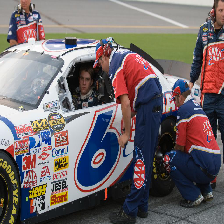

In [3]:
new_image = image.load_img('../Data/Prediction/test_image_3.jpg', target_size=(224, 224))
new_image

Change the image to array

In [4]:
transformed_image = image.img_to_array(new_image)
transformed_image.shape

(224, 224, 3)

Expand the tranfromed image with 4th Dimension

In [5]:
transformed_image = np.expand_dims(transformed_image, axis=0)
transformed_image.shape

(1, 224, 224, 3)

Preprocess the Image

In [6]:
transformed_image = preprocess_input(transformed_image)
transformed_image

array([[[[ 4.2060997e+01,  3.1221001e+01,  2.5320000e+01],
         [ 4.3060997e+01,  3.2221001e+01,  2.6320000e+01],
         [ 4.3060997e+01,  3.2221001e+01,  2.6320000e+01],
         ...,
         [-4.5939003e+01, -5.3778999e+01, -2.7680000e+01],
         [-4.1939003e+01, -5.3778999e+01, -3.9680000e+01],
         [-5.1939003e+01, -6.5778999e+01, -5.6680000e+01]],

        [[ 4.3060997e+01,  3.2221001e+01,  2.6320000e+01],
         [ 4.4060997e+01,  3.3221001e+01,  2.7320000e+01],
         [ 4.5060997e+01,  3.4221001e+01,  2.8320000e+01],
         ...,
         [-3.9390030e+00, -6.7789993e+00,  2.6320000e+01],
         [-3.4939003e+01, -3.9778999e+01, -1.6680000e+01],
         [-3.9939003e+01, -4.8778999e+01, -2.7680000e+01]],

        [[ 4.3060997e+01,  3.2221001e+01,  2.6320000e+01],
         [ 4.5060997e+01,  3.4221001e+01,  2.8320000e+01],
         [ 4.4060997e+01,  3.3221001e+01,  2.7320000e+01],
         ...,
         [ 2.8060997e+01,  3.0221001e+01,  7.2320000e+01],
         [

Create a predictor variable

In [7]:
y_pred = classifier.predict(transformed_image)
y_pred

array([[1.32224713e-07, 4.31506919e-08, 8.81366122e-06, 1.12002908e-06,
        1.33378796e-06, 1.34368577e-07, 3.31161459e-07, 8.70279564e-07,
        8.96669121e-08, 3.17487178e-07, 5.54131097e-09, 9.00614339e-09,
        4.68394301e-09, 4.76349715e-09, 3.79924758e-09, 1.40650416e-08,
        5.67049376e-08, 2.17645635e-07, 7.38234363e-08, 2.35858924e-08,
        3.50085871e-09, 3.75515157e-08, 2.24133601e-07, 4.28818703e-06,
        1.06124325e-07, 3.05507797e-08, 3.60898555e-09, 2.07393409e-08,
        1.90325409e-08, 7.97811772e-09, 3.00208498e-08, 2.28000516e-08,
        7.63071206e-09, 3.94488688e-06, 3.19518040e-05, 7.74816300e-08,
        8.05907376e-08, 2.99749630e-08, 1.13636576e-08, 5.51551921e-07,
        1.07382503e-08, 7.06694037e-09, 6.04277830e-07, 1.06339151e-08,
        5.81305422e-08, 2.03061219e-07, 8.74308359e-09, 1.43364058e-08,
        7.60186580e-08, 1.60647517e-07, 5.41745280e-08, 3.79488642e-06,
        4.54749880e-07, 5.16087027e-07, 8.43102939e-08, 2.751774

Check the shape of the array

In [8]:
y_pred.shape

(1, 1000)

Make the predictions

In [9]:
from keras.applications.resnet50 import decode_predictions
decode_predictions(y_pred, top=5)

[[('n04037443', 'racer', 0.8013074),
  ('n04285008', 'sports_car', 0.06431753),
  ('n02974003', 'car_wheel', 0.024077434),
  ('n02504013', 'Indian_elephant', 0.019822922),
  ('n04461696', 'tow_truck', 0.007778575)]]

Make the predictions in readable form

In [10]:
label = decode_predictions(y_pred)
# retrieve the most likely result, i.e. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

racer (80.13%)
